<a href="https://colab.research.google.com/github/shamabansal17/Predicting-probabilty-to-get-admission-in-IVY-colleges/blob/main/Jamboree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6rDFEwWbJ6hQ3N3PRTVC3petIA9OWSWSR9A&s" alt="Sample Image" style="width:50%;">
</center>


# <font color='green' size=15>***JAMBOREE:***<br> *Machine Learning- Linear Regression Project*</font>

<font size=6>Developed by Shama Bansal

### <font color='green' size=6>*About Jamboree*</font><br>
<font size=4>

Jamboree is India’s leading institute for study abroad test prep and admission counselling. With the highest scores for GMAT and GRE in the industry and admission offers from the best universities worldwide, Jamboree has helped thousands of students get into their dream universities.
It provides rigorous test prep for GRE, GMAT, IELTS, & TOEFL; in-depth application guidance; and comprehensive interview training that is valued most by top universities around the world.
Jamboree's unique problem-solving methods ensure maximum scores with minimum effort.

### <font color='green' size=6>*Problem Statement : Predicting Graduate Admission to IVY League Colleges*</font><br>
<font size=4>

To support students, Jamboree has recently introduced a new feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Jamboree need assistance in understanding the crucial
factors impacting graduate admissions and their interrelationships. Primary objective is to analyze the given dataset and derive valuable insights from it. We need to provide predictive insights to determine an individual's likelihood of admission based on the available features.

<font color='green' size=5>*Key Questions :*</font><br>
What are the critical factors impacting graduate admissions?<br>
How do these factors interact with each other?<br>
Can we build a predictive model to estimate an applicant’s chances of admission?

<font color='green' size=5>*Deliverables :*</font><br>

Exploratory Data Analysis (EDA) to identify patterns and trends.<br>
Feature engineering to enhance predictive power.<br>
Building a predictive model (Logistic regression).<br>
Evaluation metrics to assess model performance.<br>
Insights and recommendations for prospective applicants.

<font color='green' size=5>*Column Profiling :*</font><br>
● Serial No.: This column represents the unique row identifier for each applicant in the
dataset.<br>
● GRE Scores: This column contains the GRE (Graduate Record Examination) scores of
the applicants, which are measured on a scale of 0 to 340.<br>
● TOEFL Scores: This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.<br>
● University Rating: This column indicates the rating or reputation of the university that
the applicants are associated with.<br>
(The rating is based on a scale of 0 to 5, with 5 representing the highest rating)<br>
● SOP: This column represents the strength of the applicant's statement of purpose,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.<br>
● LOR: This column represents the strength of the applicant's letter of recommendation,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.<br>
● CGPA: This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.<br>
● Research: This column indicates whether the applicant has research experience (1) or
not (0).<br>
● Chance of Admit: This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.







### <font color='green'>*Importing necessary Libraries*</font>


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### <font color='green'> *Downloading Dataset*</font>

In [3]:
!gdown 1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4

Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Admission_Predict_Ver1.1.csv
100% 16.2k/16.2k [00:00<00:00, 33.5MB/s]


### <font color='green'>*Reading Dataset*</font>

In [4]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## <font color='green' size=8>*Checking Data Structure and its attributes*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### <font color='green'>*Checking Duplicate Values*</font>


In [6]:
df[df.iloc[:,1:].duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


### <font color='green'>*Checking Missing Values*</font>


In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

### <font color='green'>*Dropping irrelevant columns*</font>


In [9]:
df.drop('Serial No.',axis=1,inplace=True)

### <font color='green'>*Statistical Summary*</font>


In [10]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### <font color='green' size=5> *Renaming column names* </font>


In [11]:
# as there is extra spaces in column names, just removing them
df.rename(columns={'Chance of Admit ':'Chance of Admit',
                   'LOR ':'LOR'},inplace=True)

- There are 500 rows and 9 columns in the dataset.
- As all columns have int and float data type, we might not need to change their data type.
- Serial No. column is unique row identifier kind of column which is not required in our model building.
- No duplicate values in the dataset.
- No missing values in the dataset too.
- `GRE Score` is between 290 to 340.
- `TOEFL Score` is between 92 to 120.
- `University Rankings`, `SOP` and `LOR` are upto 5, 5 being the highest.
- `CGPA` is from 6.8 to 9.92.
- `Research` column shows 56% applicants has research experience.
- More than 75% applicants have more than 0.63 probability of getting admission.


### <font color='green' size=5> *Checking Outliers* </font>


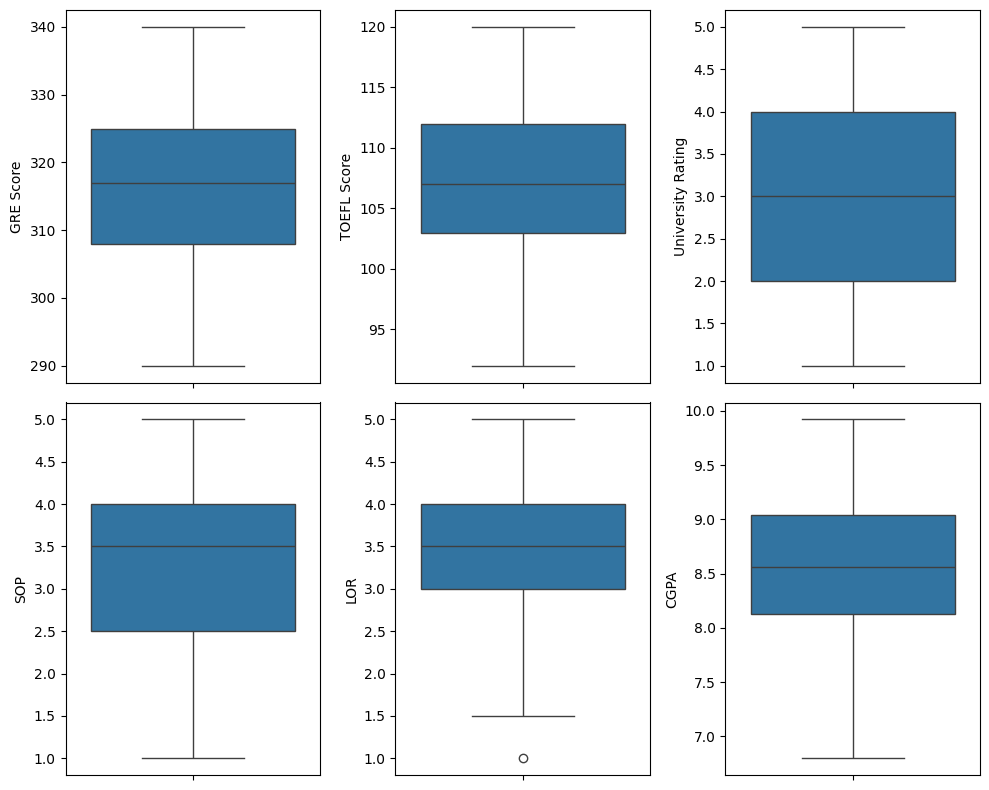

In [12]:
column=df.columns[:6]
i=1
plt.figure(figsize=(10,8))
for col in column:
  plt.subplot(2,3,i)
  sns.boxplot(df[col])
  i+=1
plt.tight_layout()
plt.show()

### <font color='green' size=5> *Dealing with Outliers* </font>

There is no outliers except in LOR, but that too is just one data point..........................................................................................................................................................................................

In [13]:
# df['LOR']=np.clip(df['LOR'],1.5,df['LOR'].max())

## <font color='green' size=6>*Exploratory Data Analysis*</font>
<br>



### <font color='green' size=5> *Univariate Analysis* </font>


In [14]:
df['GRE Score'].value_counts().head()

GRE Score
312    24
324    23
316    18
321    17
322    17
Name: count, dtype: int64

In [15]:
df['TOEFL Score'].value_counts().head()

TOEFL Score
110    44
105    37
104    29
107    28
106    28
Name: count, dtype: int64

In [16]:
df['CGPA'].value_counts().head()

CGPA
8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
Name: count, dtype: int64

In [17]:
df['Chance of Admit'].value_counts().head()

Chance of Admit
0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
Name: count, dtype: int64

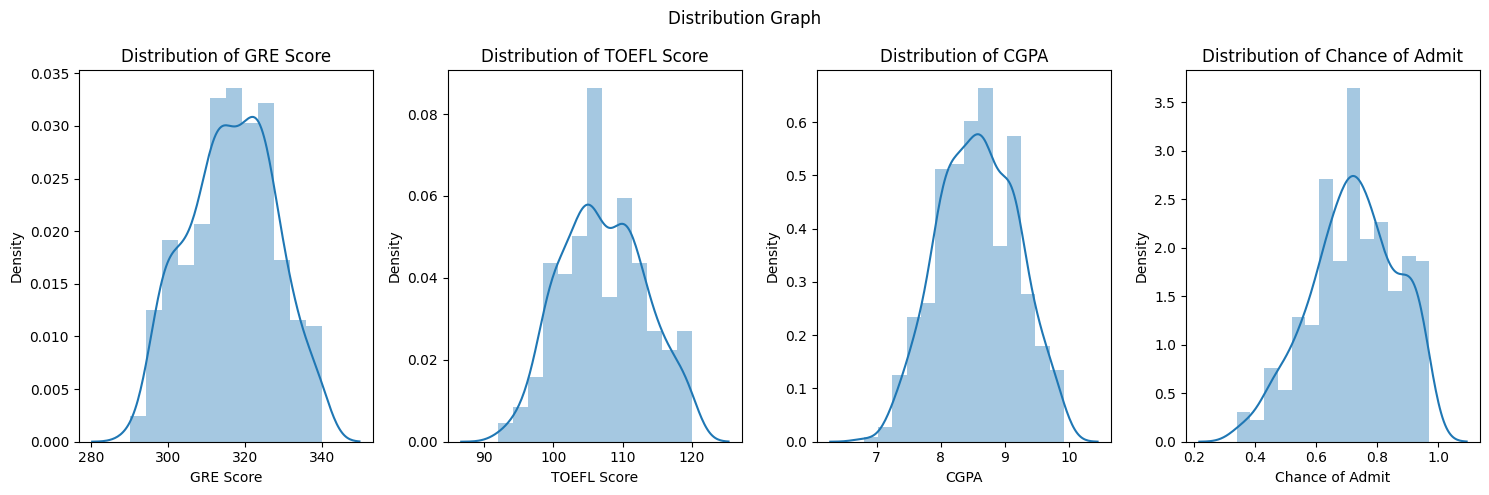

In [18]:
column=['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
plt.figure(figsize=(15,5))
i=1
plt.suptitle('Distribution Graph')
for col in column:
  plt.subplot(1,4,i)
  plt.title(f'Distribution of {col}')
  sns.distplot(df[col])
  i+=1
plt.tight_layout()
plt.show()

In [19]:
column=[ 'University Rating', 'SOP', 'LOR','Research']
for col in column:
  print(df[col].value_counts())
  print('*'*50)

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64
**************************************************
SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64
**************************************************
LOR
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64
**************************************************
Research
1    280
0    220
Name: count, dtype: int64
**************************************************


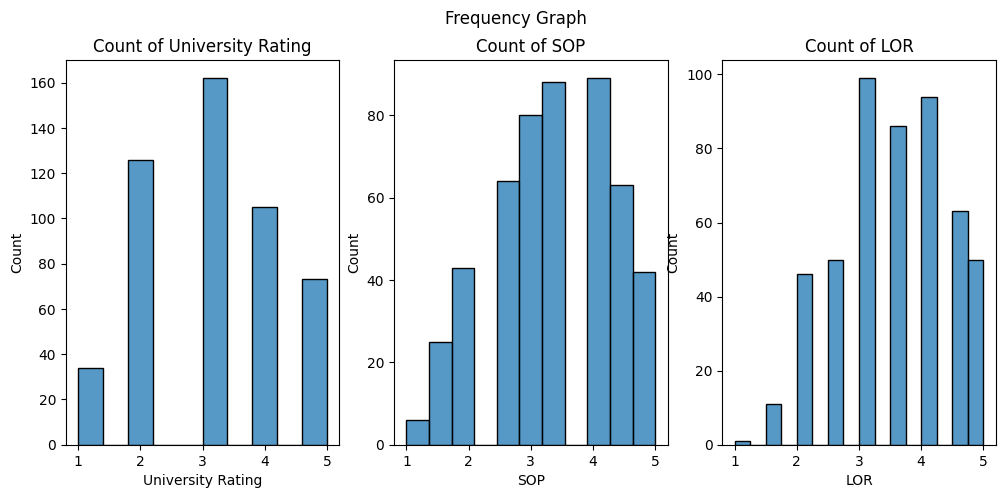

In [20]:
column=['University Rating', 'SOP', 'LOR']
plt.figure(figsize=(12,5))
i=1
plt.suptitle('Frequency Graph')
for col in column:
  plt.subplot(1,3,i)
  plt.title(f'Count of {col}')
  sns.histplot(df[col])
  i+=1

plt.show()

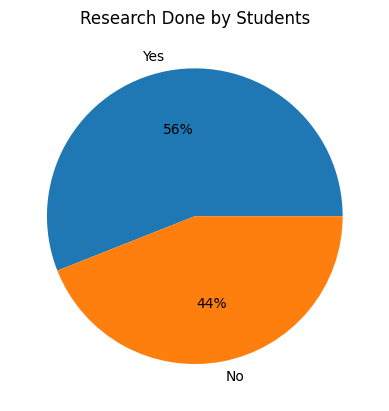

In [21]:
plt.title('Research Done by Students')
plt.pie(df['Research'].value_counts(),labels=['Yes','No'],autopct='%1.0f%%')
plt.show()

- We can see the GRE score for most students is between 310 to 330.
- TOEFL score for most is between 100 to 110.
- CGPA is mostly 8 to 9 in students data.
- Chance of admit is left skewed means some students have very less chance though more are having high chance of getting admissions in prestigious colleges.
- Most of our students are assosciated with universities having ranking 2 and more, with most form 3+ ratings.
- SOP of our students is also on positive sude mostly greater than 2.
- LOR is above 3 for most of students.
- 56% students have done the research.

### <font color='green' size=5> *Bivariate Analysis* </font>


<Axes: >

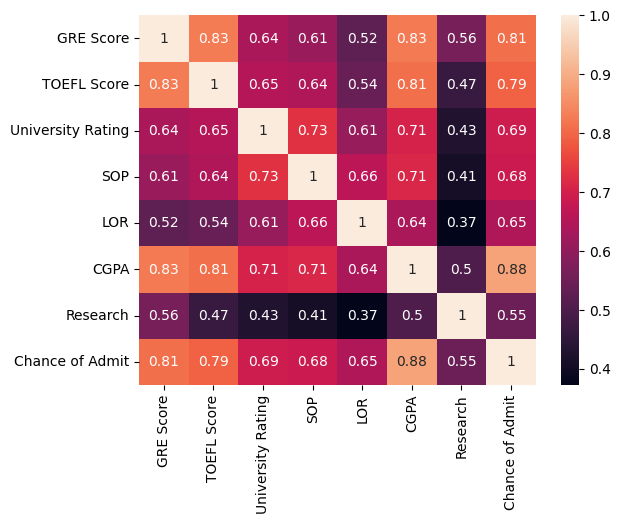

In [22]:
sns.heatmap(df.corr(),annot=True)

### <font color='green' size=5> *Multivariate Analysis* </font>


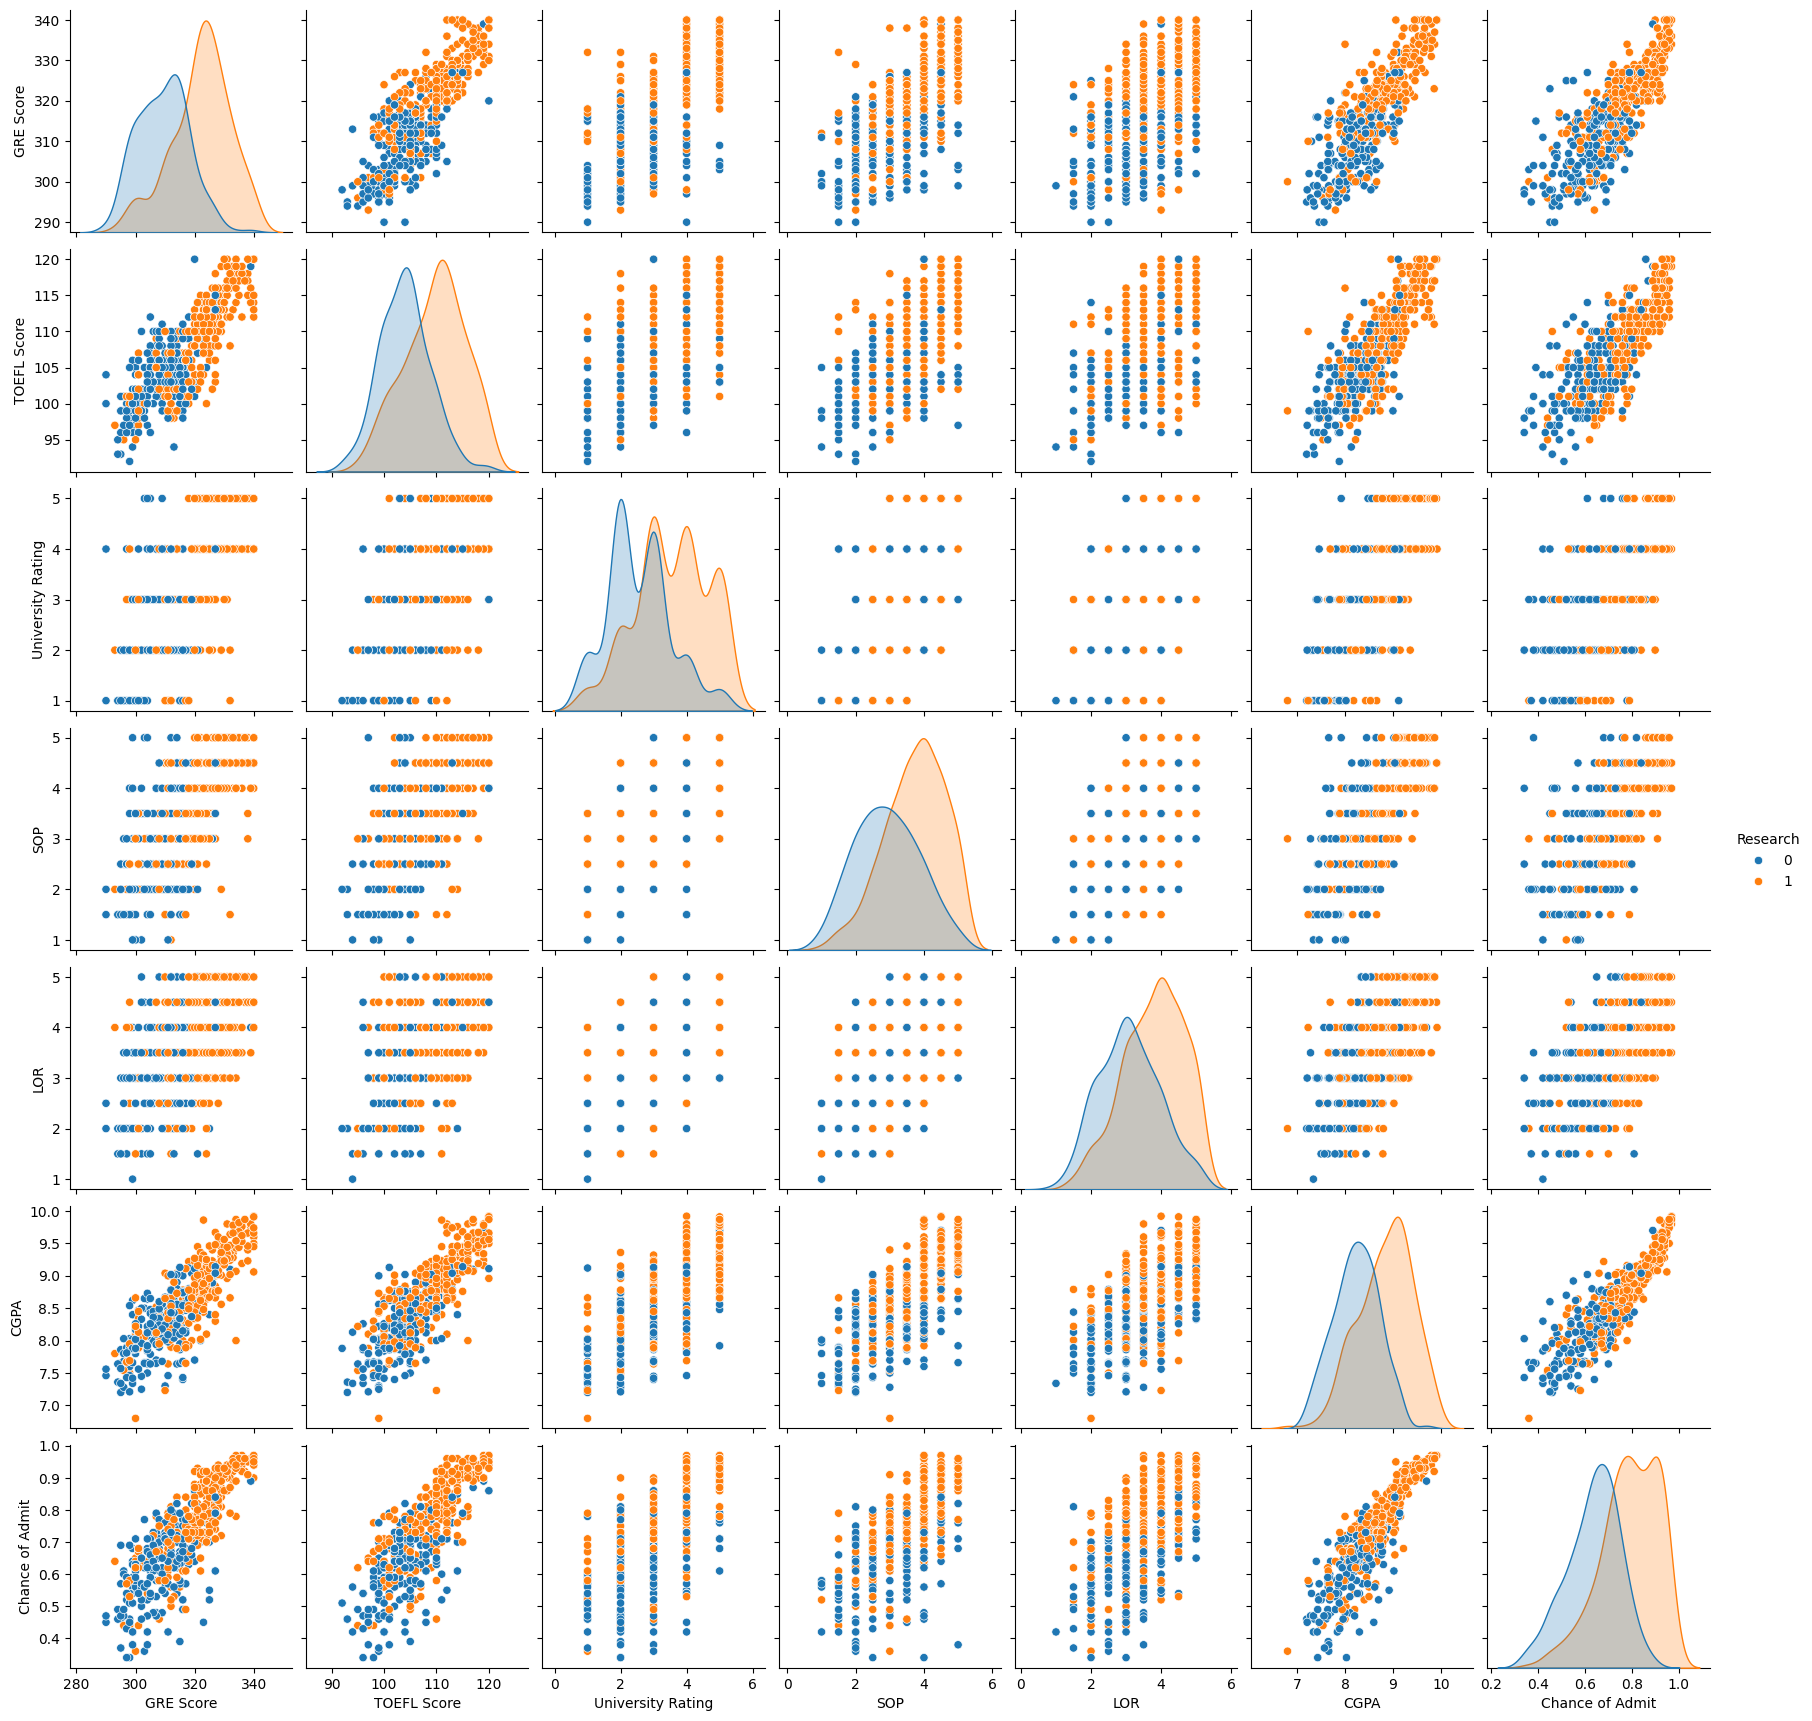

In [23]:
sns.pairplot(df,hue='Research')
plt.show()

- Features are positively correlated with each other and with Target too but no correlation is so high(>90) to remove these features and we are needed to check vif to check their multicollinearilty later.
- Students having high CGPA are having high GRE score, TOEFL score,SOP, LOR etc.
- GRE score is high when student did some research.
- With multivariate analysis we can see almost all features are positively correlated with each other and with target variable too.<br><br><br>
# <font color='green' size=8> *Implementing Linear Regression* </font>

In [24]:
# separting dataset into featureS and label


X=df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']

In [25]:
# splitting data into train and test

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=40)

In [26]:
# checking shape of train and test dataset

Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((400, 7), (100, 7), (400,), (100,))

In [27]:
# scaling features as per standardisation technique

scaler=StandardScaler()
scaler.fit(Xtrain)

X_train=pd.DataFrame(scaler.transform(Xtrain),columns=Xtrain.columns)
X_test=pd.DataFrame(scaler.transform(Xtest),columns=Xtest.columns)

In [28]:
# using statsmodel to implement linear regression model

X_train = sm.add_constant(X_train)
# Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(ytrain.values, X_train)
results = model.fit()

# Getting the summary statistics of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     269.5
Date:                Mon, 15 Jul 2024   Prob (F-statistic):          1.55e-145
Time:                        10:49:19   Log-Likelihood:                 566.49
No. Observations:                 400   AIC:                            -1117.
Df Residuals:                     392   BIC:                            -1085.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7186      0.00

H$_0$ : Weights are 0 or feature is not having any significant importance.<br>
H$_a$ : Feature is important with significant weights.<br>
alpha = 0.5
<br><br>

Since *pvalue* for SOP is  0.628 which is very high, we cant reject Null Hypothesis which results that `SOP` is not a significant feature, so dropping that.




In [29]:
# Dropping  sOP feature from train and test data.

X_train.drop(columns='SOP',inplace=True)
X_test.drop(columns='SOP',inplace=True)

In [30]:
# Training the model again without SOP feature
model = sm.OLS(ytrain.values, X_train)
results_drop = model.fit()

# getting the summary statistics of the model
print(results_drop.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     315.0
Date:                Mon, 15 Jul 2024   Prob (F-statistic):          9.43e-147
Time:                        10:49:19   Log-Likelihood:                 566.37
No. Observations:                 400   AIC:                            -1119.
Df Residuals:                     393   BIC:                            -1091.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7186      0.00

We can see the *R$^2$* score is same even after dropping the SOP which confirms that this feature was useless for our prediction model.
Lets see for University Ranking too.

H$_0$ : Weights are 0 or feature is not having any significant importance.<br>
H$_a$ : Feature is important with significant weights.<br>
alpha = 0.5
<br><br>

Since *pvalue* for University Ranking is  0.106 which is greater than p value, we cant reject Null Hypothesis which results that `University Ranking` is not a significant feature, so dropping that too.




In [31]:
# Dropping University Ranking feature from train and test data

X_train.drop(columns='University Rating',inplace=True)
X_test.drop(columns='University Rating',inplace=True)

In [32]:
# Training the model again without University Ranking feature

model = sm.OLS(ytrain.values, X_train)
results_drop = model.fit()

# Print the summary statistics of the model
print(results_drop.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     376.0
Date:                Mon, 15 Jul 2024   Prob (F-statistic):          1.71e-147
Time:                        10:49:19   Log-Likelihood:                 565.04
No. Observations:                 400   AIC:                            -1118.
Df Residuals:                     394   BIC:                            -1094.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7186      0.003    242.063      

We can see that our adjusted R$^2$ score is same as before, when we had University ranking in our model, its just that R$^2$ score decreased by 0.001 which is not much to concern about.

In [33]:
# Checking the coefficients of features

results_drop.params

const          0.718550
GRE Score      0.023381
TOEFL Score    0.021201
LOR            0.018515
CGPA           0.071390
Research       0.010206
dtype: float64

###  <font color='green' size=5> *Interpretability of model* </font>

- The feature `CGPA` is most important feature to get the probability of a student to get admission in Top College or not after the W$_0$ which have coefficient of 0.72. while the least important feature is `Research`.
- Adjusted. R$^2$ reflects the fit of the model. RR$^2$ values range from 0 to 1,where a higher value generally indicates a better fi t, assuming certain conditions are met.Here the value is 0.825 whichis satisfactory.
- Const coefficient is your Y-intercept. It means that if all the features coefficients are zero, then the expected output (i.e., the Y_pred) wouldbe equal to the const coefficient.
- Other features coefficient represents the change in the output (chance of admit) due to a change of one unit in one particular feature (everything else held constant)
- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy. Here our std err is quite low, shows our model is highly accurate
- P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant and more than p value means feture is not  useful, t5hus we dropped `SOF` and `University Ranking`.
Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

In [34]:
# predicting label for test data

X_test=sm.add_constant(X_test)
y_pred=results_drop.predict(X_test)
y_pred


0     0.639723
1     0.591360
2     0.599743
3     0.944502
4     0.684817
        ...   
95    0.664026
96    0.630916
97    0.746277
98    0.900323
99    0.739505
Length: 100, dtype: float64

In [ ]:
np.mean(y_pred-ytest)

0.01392113230566161

In [ ]:
x_test=sm.add_constant(xtest_stand)
y_pred=results_drop1.predict(x_test)
y_pred

0     0.642776
1     0.589854
2     0.604814
3     0.940785
4     0.680612
        ...   
95    0.665502
96    0.638702
97    0.744661
98    0.904371
99    0.738052
Length: 100, dtype: float64

In [ ]:
np.mean(y_pred-ytest)

0.013921132305661346

### <font color='green' size=5> *Checking Assumptions* </font>


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = pd.DataFrame(xtrain_scaled, columns=xtrain_scaled.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.69
1,GRE Score,4.63
2,TOEFL Score,3.98
3,University Rating,2.37
4,LOR,1.90
6,Research,1.53
0,const,1.00


In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(xtrain_minmax, columns=xtrain_minmax.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.02
5,CGPA,4.69
1,GRE Score,4.63
2,TOEFL Score,3.98
3,University Rating,2.37
4,LOR,1.90
6,Research,1.53


In [ ]:
np.mean(ytest-y_pred.values)

0.001220712200342885

In [ ]:
xtrain=x_train.drop(columns='const')
xtest=x_test.drop(columns='const')

NameError: name 'x_train' is not defined

In [ ]:


model = sm.OLS(ytrain, xtrain)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

In [ ]:
y_pred=results.predict(xtest)
y_pred

In [ ]:
np.mean(ytest.values-y_pred.values)


In [ ]:
df.columns


### <font color='green' size=5> ** </font>
